In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt


In [9]:
df=pd.read_csv("credit_card_fraud_dataset.csv")
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [11]:
print(df.columns)

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')


In [17]:
label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,1,7,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,1,1,0
2,3,2024-01-08 10:08:35.462834,784.00,394,0,4,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,0,5,0
4,5,2024-07-12 18:51:35.462858,369.07,475,0,6,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,1,7,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,1,7,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,0,7,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,0,5,0


In [21]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day
df['Hour'] = df['TransactionDate'].dt.hour
df['Minute'] = df['TransactionDate'].dt.minute
df['Second'] = df['TransactionDate'].dt.second
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Year,Month,Day,Hour,Minute,Second
0,1,2024-04-03 14:15:35.462794,4189.27,688,1,7,0,2024,4,3,14,15,35
1,2,2024-03-19 13:20:35.462824,2659.71,109,1,1,0,2024,3,19,13,20,35
2,3,2024-01-08 10:08:35.462834,784.00,394,0,4,0,2024,1,8,10,8,35
3,4,2024-04-13 23:50:35.462850,3514.40,944,0,5,0,2024,4,13,23,50,35
4,5,2024-07-12 18:51:35.462858,369.07,475,0,6,0,2024,7,12,18,51,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,1,7,0,2024,6,7,0,57,36
99996,99997,2023-10-22 23:12:36.027594,297.25,745,1,7,0,2023,10,22,23,12,36
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,0,7,0,2024,5,31,19,27,36
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,0,5,0,2024,10,18,9,43,36


In [23]:
df = df.drop('TransactionDate', axis=1)
df

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,Year,Month,Day,Hour,Minute,Second
0,1,4189.27,688,1,7,0,2024,4,3,14,15,35
1,2,2659.71,109,1,1,0,2024,3,19,13,20,35
2,3,784.00,394,0,4,0,2024,1,8,10,8,35
3,4,3514.40,944,0,5,0,2024,4,13,23,50,35
4,5,369.07,475,0,6,0,2024,7,12,18,51,35
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1057.29,289,1,7,0,2024,6,7,0,57,36
99996,99997,297.25,745,1,7,0,2023,10,22,23,12,36
99997,99998,3448.56,690,0,7,0,2024,5,31,19,27,36
99998,99999,3750.79,644,0,5,0,2024,10,18,9,43,36


In [25]:
X = df.drop(['TransactionID', 'IsFraud'], axis=1)
y = df['IsFraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

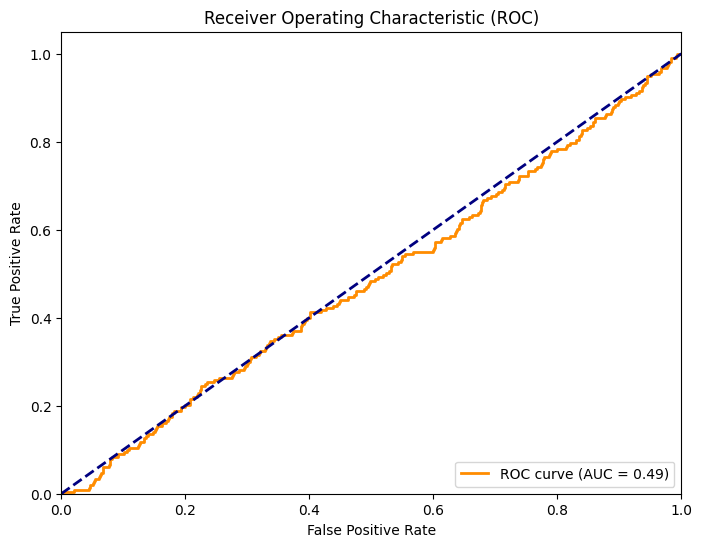

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

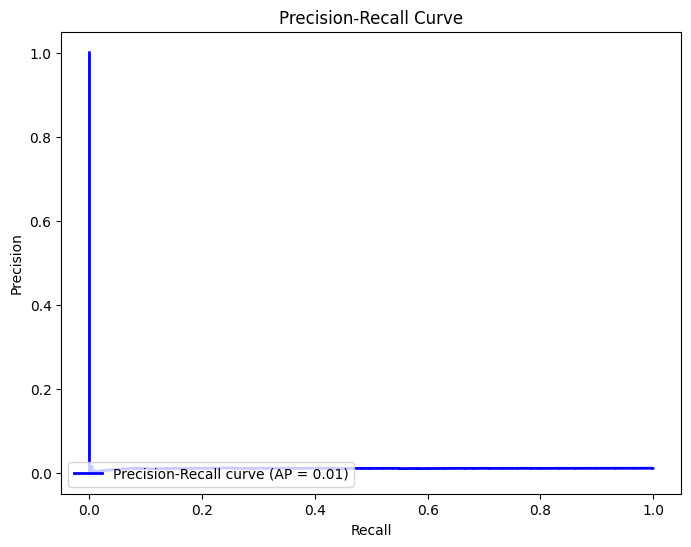

AUC Score: 0.49
Average Precision Score: 0.01


In [31]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Score: {roc_auc:.2f}")
print(f"Average Precision Score: {average_precision:.2f}")